# CS:GO Competitive Matchmaking

Damage and grenade entries on over 410k rounds played in competitive Counter-Strike: Global Offensive.<br>
Source: https://www.kaggle.com/datasets/skihikingkevin/csgo-matchmaking-damage

### Table of contents
1. [Insights](#insights)
2. [Feature Summary](#features)
3. [Exploratory Analysis](#explore)
4. [Map Balance](#balance)
5. [Econ Similarities to Valorant](#econ)
6. [Does First Blood Matter?](#firstblood)

These csv files include data from over 16,400 ESEA matches, as well as around 1,400 ranked matches, from the game Counter-Strike: Global Offensive. All data was extracted from competitive matchmaking replays that were submitted to a site called csgo-stats. The author states that this data is meant for exploratory analysis.

The datasets provided include the following (where there are multiple files for some):
- **esea_master_dmg_demos:** each row is a damage entry in which one player (or world) has dealt damage to another
- **esea_master_grenades_demos:** each row is a grenade thrown entry in which one player has used a purchasable utility grenade
- **esea_master_kills_demos:** each row is a kill entry
- **esea_meta_demos:** each row is per round meta information (round winner, round time, etc) 
- **map_data:** in game map coordinates
- **mm_grenades_demos:** each row is a grenade thrown entry in which one player has used a purchasable utility grenade
- **mm_master_demos:** each row is a damage entry in which one player (or world) has dealt damage to another

Note: all files beginning with "esea" are from ESEA matches ranging from pugs to scrims that were scraped during a period of two weeks in August 2018. Here, the player ranks are unknown, but they are presumably high ranked pro players.<br>
The files beginning with "mm" are from matchmaking matches (ranked) with average ranks between gold nova 1 and legendary eagle master.

Some **background info** on how the game works: it is a tactical shooter that involves two teams of 5. The games consist of at most 30 rounds with two 15 round halves. For the first half, one team starts as the "terrorists" in which they must take control of one of the enemy team's (the "counter terrorists") bomb sites and plant a bomb. To win, the bomb must either explode (not be defused by the "counter terrorists") or the "terrorists" must eliminate the entire enemy team. For the "counter terrorists" to win the round, they must either eliminate all the "terrorists" or defuse the planted bomb. After 15 rounds, the two teams swap sides. First team to win 16 rounds will win the entire game.

---

## Insights <a name="insights"></a>

CS:GO is one of the most popular tactical shooter games. I have personally never played it, instead I am more familiar with Valorant, which is also a tactical shooter but with added agent abilities (each character has special abilities only available to them, similar to games like Overwatch). Since Valorant's release, naturally, there has been much debate about which game is better. I had originally hoped to analyze Valorant data, however, either because Valorant is too new of a game (3 years old) or Riot is very stingy with their data, I could not find sufficient data. I hope to use this data to see how similar these games are while also extracting new insights on the advantages and disadvantages of certain actions mid game. I believe the latter types of insights can also be very helpful for Valorant gameplay, since at the end of the day these are both tactical shooters with the same objectives and win conditions.

In particular, one of the biggest arguments against Valorant is that CS:GO's maps are designed better. In Valorant, some maps are known to be heavily defense sided, making it very hard for the team that starts on the attack side to win. The data downloaded also included images of CS:GO's official radar maps, and just by taking a quick glance at some of the maps, I do believe that CS:GO's maps are more balanced (i.e. around 50% win rate from both sides).

Another insight that I hope to gain is how similar the economy is in CS:GO compared to Valorant. Economy is a huge aspect of Valorant (and I think CS:GO if it pans out similarly). At the start of each round, each team is designated a certain amount of money to spend on weapons and utility (smokes and grenades). The team that won the previous round is rewarded with more money to spend. Players that got kills are also given more money individually. Additionally, the players that did not die the previous round get to keep their weapons and unused utility. This added layer of complexity makes cooperation between teammates a necessity (at least in Valorant). It results in "save" rounds where teammates must agree to not buy weapons in hopes that they can buy full loadouts the next round. This is basically a forfeit of the current round (but sometimes still winnable!) to ensure that the struggling team will eventually have the same guns as the enemy team for an even fight (because if you keep losing rounds, eventually you cannot afford to keep buying the more powerful guns). I predict that, despite their differences in utility, there are similar econ patterns in CS:GO as there are in Valorant.

The last insight I hope to gain is analyzing how first blood (the first kill of a round) affects the round outcome. I think the insights gained here will pertain to both games. My hypothesis is that first blood will affect the outcome, i.e. the team that got the first blood will be more likely to win the round. However, I think that this is only true for the attackers (the "terrorists") since the defenders (the "counter terrorists") have to control multiple sites. If the attackers get that first kill it will spread out the defenders making it easier to take a site. But if the defenders get the first kill, I predict that it won't matter as much since the attackers can still attack a site that may be only held by 2 or 3 players while they themselves have 4 players.

---

## Feature Summary <a name="features"></a>

Since there are 7 different types of datasets included in this data, we will describe each one separately, starting with `esea_master_dmg_demos`. The `esea` datasets are scrim data (matches between high level teams or pros) and therefore will offer us better insights on how the game should be played. The `mm` datasets are ranked game datasets and can, in some places, be less useful to us since the behavior in these games is unlikely to coincide with intended gameplay (i.e. lower level players do not know how to play the game correctly).

1. [esea master dmg demos](#damage)
2. [esea master grenades demos](#grenades)
3. [esea master kills demos](#kills)
4. [esea meta demos](#meta)
5. [map data](#map)
6. [mm grenades demos](#mmg)
7. [mm master demos](#master)

### 1. esea_master_dmg_demos <a name="damage"></a>

This data describes the damage dealt to players. Each row is a damage entry in which one player (or world) has dealt damage to another. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # display all columns

In [2]:
dmg_df = spark.read.load('hdfs://orion08:24001/csgo/esea_master_dmg_demos.part*.csv',
                         format='csv',
                         sep=',',
                         inferSchema='true',
                         header='true')
dmg_df.count()

10538182

In [3]:
# extract the first 5 rows and schema from spark df
dmg_df_subset = dmg_df.head(5)
dmg_schema = dmg_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_dmg_df = pd.DataFrame(dmg_df_subset, columns=dmg_schema.fieldNames())
pandas_dmg_df

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,14372,111.8476,World,Animal Style,None,CounterTerrorist,1,0,False,None,Generic,Unknown,Unkown,0,0,76561198055054795,0,0.0000,0.00000,0.0000,0.000000
1,esea_match_13770997.dem,1,15972,124.3761,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,18,9,False,None,Stomach,USP,Pistol,76561198048742997,0,76561198082200410,0,-1499.6900,63.33829,-669.5558,-79.769570
2,esea_match_13770997.dem,1,16058,125.0495,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,100,0,False,None,Head,USP,Pistol,76561198055054795,0,76561197961009213,0,-1066.8740,3.44563,-614.1868,-91.707770
3,esea_match_13770997.dem,1,16066,125.1121,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,12,7,False,None,RightArm,Glock,Pistol,76561198082200410,0,76561198055054795,0,-747.3146,-49.32681,-1065.5560,9.381622
4,esea_match_13770997.dem,1,16108,125.4410,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,15,7,False,None,Chest,USP,Pistol,76561198048742997,0,76561198082200410,0,-1501.8610,49.19798,-748.4188,-53.469220


<u>Feature Descriptions:</u>

**file:** the file name that the demo was scraped from, unique for each match<br>
**round:** the round that the damage took place<br>
**tick:** the current tick in the match (an update between the game's server and connected PCs), measured in hertz<br>
**seconds:** the number of seconds into the _match_ in which the damage occurred<br>
**att_team:** the team of the player that dealt damage to the victim (world included)<br>
**vic_team:** the team of the player that received damage<br>
**att_side:** the side that the attacker was on (Terrorist or CounterTerrorist)<br>
**vic_side:** the side that the victim was on (Terrorist or CounterTerrorist)<br>
**hp_dmg:** the total damage dealt in that duel to the victim, each player starts the round with 100 max hp<br>
**arm_dmg:** the total damage dealt to Kevlar (armor) <br>
**is_bomb_planted:** has the bomb been planted as of this entry<br>
**bomb_site:** the site the bomb is planted at (only A or B), empty if `is_bomb_planted` is false<br>
**hitbox:** the body area the victim was struck in<br>
**wp:** the weapon that the attacker used to deal damage<br>
**wp_type:** the type of weapon that the attacker used<br>
**att_id:** the steam id of the attacker, unique for each player<br>
**att_rank:** the new rank of the attacking player after the match is complete (unknown for all)<br>
**vic_id:** the steam id of the victim, unique for each player<br>
**vic_rank:** the new rank of the victim after the match is complete (unknown for all)<br>
**att_pos_x:** the X position of the attacker when they started the engagement<br>
**att_pos_y:** the Y position of the attacker when they started the engagement<br>
**vic_pos_x:** the X position of the victim when they received damage<br>
**vic_pos_y:** the Y position of the victim when they received damage

Note: all X and Y positions are in game coordinates and must be converted before being plotted on the radar maps, guide for conversion https://github.com/akiver/CSGO-Demos-Manager/blob/376cc90eb49425050b351bc933940480f6d48075/Services/Concrete/Maps/MapService.cs

### 2. esea_master_grenades_demos <a name="grenades"></a>

This data describes the player utility usage. Each row is a grenade thrown entry in which one player has used a purchasable utility grenade.

In [4]:
grenades_df = spark.read.load('hdfs://orion08:24001/csgo/esea_master_grenades_demos.part*.csv',
                              format='csv',
                              sep=',',
                              inferSchema='true',
                              header='true')
grenades_df.count()

5246458

In [5]:
# extract the first 5 rows and schema from spark df
grenades_df_subset = grenades_df.head(5)
grenades_schema = grenades_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_grenades_df = pd.DataFrame(grenades_df_subset, columns=grenades_schema.fieldNames())
pandas_grenades_df

,file,round,seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,153.1602,Animal Style,None,76561198165334141,NaN,CounterTerrorist,None,0,0,True,B,None,Smoke,0,NaN,-1618.146,-66.00259,-949.8569,-340.3019,NaN,NaN
1,esea_match_13770997.dem,2,184.7945,Hentai Hooligans,Animal Style,76561198037331400,7.656120e+16,Terrorist,CounterTerrorist,70,0,False,None,Generic,HE,0,0.0,-1719.904,-2357.64700,-2774.6650,-1603.9430,-2741.25,-1523.163
2,esea_match_13770997.dem,2,186.8617,Animal Style,None,76561198055191021,NaN,CounterTerrorist,None,0,0,False,None,None,HE,0,NaN,-1036.352,492.16760,-466.8676,-356.9641,NaN,NaN
3,esea_match_13770997.dem,2,187.1122,Animal Style,None,76561198055054795,NaN,CounterTerrorist,None,0,0,False,None,None,HE,0,NaN,-855.077,438.69090,-459.0147,-543.8581,NaN,NaN
4,esea_match_13770997.dem,2,191.0587,Hentai Hooligans,None,76561198037331400,NaN,Terrorist,None,0,0,False,None,None,Molotov,0,NaN,-2617.490,-1832.40700,-2743.5610,-927.2995,NaN,NaN


<u>Feature Descriptions:</u>

**file:** the file name that the demo was scraped from, unique for each match<br>
**round:** the round that the damage took place<br>
**seconds:** the number of seconds into the _match_ in which the event occurred<br>
**att_team:** the team of the player that dealt damage to the victim (world included)<br>
**vic_team:** the team of the player that received damage<br>
**att_id:** the steam id of the attacker, unique for each player<br>
**vic_id:** the steam id of the victim, unique for each player<br>
**att_side:** the side that the attacker was on (Terrorist or CounterTerrorist)<br>
**vic_side:** the side that the victim was on (Terrorist or CounterTerrorist)<br>
**hp_dmg:** the total damage dealt in that duel to the victim, each player starts the round with 100 max hp<br>
**arm_dmg:** the total damage dealt to Kevlar (armor) <br>
**is_bomb_planted:** has the bomb been planted as of this entry<br>
**bomb_site:** the site the bomb is planted at (only A or B), empty if `is_bomb_planted` is false<br>
**hitbox:** the body area the victim was struck in<br>
**nade:** type of utility used (Decoy, HE, Smoke, Flash, or Molotov)<br>
**att_rank:** the new rank of the attacking player after the match is complete (unknown for all)<br>
**vic_rank:** the new rank of the victim after the match is complete (unknown for all)<br>
**att_pos_x:** the X position of the attacker when they started the engagement<br>
**att_pos_y:** the Y position of the attacker when they started the engagement<br>
**nade_land_x:** the X position of the utility when it exploded or started<br>
**nade_land_y:** the Y position of the utility when it exploded or started<br>
**vic_pos_x:** the X position of the victim when they received damage<br>
**vic_pos_y:** the Y position of the victim when they received damage

Note: this dataset is referenced as grenades, but it's really any of the six utilities that are available for purchase.<br>
This includes decoys, high explosive grenades, smokes, flashbangs, incendiaries, molotovs.

### 3. esea_master_kills_demos <a name="kills"></a>

This data describes the players killed during a round. Each row is a kill entry.

In [6]:
kills_df = spark.read.load('hdfs://orion08:24001/csgo/esea_master_kills_demos.part*.csv',
                           format='csv',
                           sep=',',
                           inferSchema='true',
                           header='true')
kills_df.count()

2742646

In [7]:
# extract the first 5 rows and schema from spark df
kills_df_subset = kills_df.head(5)
kills_schema = kills_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_kills_df = pd.DataFrame(kills_df_subset, columns=kills_schema.fieldNames())
pandas_kills_df

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,5,4,False
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,4,4,False
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,3,4,False
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,3,3,False
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,2,3,False


<u>Feature Descriptions:</u>

**file:** the file name that the demo was scraped from, unique for each match<br>
**round:** the round that the damage took place<br>
**tick:** the converted tick to seconds within the game since match start<br>
**seconds:** the number of seconds into the _round_ in which the event occurred<br>
**att_team:** the team of the player that dealt damage to the victim (world included)<br>
**vic_team:** the team of the player that received damage<br>
**att_side:** the side that the attacker was on (Terrorist or CounterTerrorist)<br>
**vic_side:** the side that the victim was on (Terrorist or CounterTerrorist)<br>
**wp:** the weapon that the attacker used to deal damage<br>
**wp_type:** the type of weapon that the attacker used<br>
**ct_alive:** the number of counter terrorist players alive after this kill event<br>
**t_alive:** the number of terrorist players alive after this kill event<br>
**is_bomb_planted:** has the bomb been planted as of this entry

Note: seconds has a different meaning here than compared to the damage and grenades data.<br>
This data is missing location features, they must be inferred from the damage data.

### 4. esea_meta_demos <a name="meta"></a>

This data includes the per round meta information for each event from the damage, grenade, and kill datasets.

In [8]:
meta_df = spark.read.load('hdfs://orion08:24001/csgo/esea_meta_demos.part*.csv',
                          format='csv',
                          sep=',',
                          inferSchema='true',
                          header='true')
meta_df.count()

377629

In [9]:
# extract the first 5 rows and schema from spark df
meta_df_subset = meta_df.head(5)
meta_schema = meta_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_meta_df = pd.DataFrame(meta_df_subset, columns=meta_schema.fieldNames())
pandas_meta_df

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550


<u>Feature Descriptions:</u>

**file:** the file name that the demo was scraped from, unique for each match<br>
**map:** the unique map name<br>
**round:** the round number<br>
**start_seconds:** the second into the demo that the round started (includes freeze time)<br>
**end_seconds:** the second into the demo that the round ended (official end)<br>
**winner_team:** the team that won at the end of that round<br>
**winner_side:** the side that the `winner_team` was on<br>
**round_type:** the estimated round type by Akiver's csgo demo manager (imperfect)<br>
**ct_eq_val:** the counter terrorist team's total equipment value (weapon + grenades + armor + utilities) after buy time<br>
**t_eq_val:** the terrorist team's total equipment value (weapon + grenades + armor + utilities) after buy time

### 5. map_data <a name="map"></a>

This data includes the coordinates of each map. The X and Y coordinates are all in-game coordinates and need to be linearly scaled to be plotted on any official radar maps.

In [10]:
map_df = spark.read.load('hdfs://orion08:24001/csgo/map_data.csv',
                          format='csv',
                          sep=',',
                          inferSchema='true',
                          header='true')
map_df.count()

7

In [11]:
# convert spark df to pandas df (small enough)
pandas_map_df = map_df.toPandas()
pandas_map_df

,_c0,EndX,EndY,ResX,ResY,StartX,StartY
0,de_cache,3752,3187,1024,1024,-2031,-2240
1,de_cbble,2282,3032,1024,1024,-3819,-3073
2,de_dust2,2127,3455,1024,1024,-2486,-1150
3,de_inferno,2797,3800,1024,1024,-1960,-1062
4,de_mirage,1912,1682,1024,1024,-3217,-3401
5,de_overpass,503,1740,1024,1024,-4820,-3591
6,de_train,2262,2447,1024,1024,-2436,-2469


<u>Feature Descriptions:</u>

**\_c0:** the unique map name<br>
**EndX:** the X position of the radar map's end<br>
**EndY:** the Y position of the radar map's end<br>
**ResX:** the X resolution of the radar map<br>
**ResY:** the Y resolution of the radar map<br>
**StartX:** the X position of the radar map's start<br>
**StartY:** the Y position of start<br>

Note: this dataset only includes data for the maps in the active duty map pool, which are the maps currently in competitive play.

### 6. mm_grenades_demos <a name="mmg"></a>

This data describes the player utility usage. Each row is a grenade thrown entry in which one player has used a purchasable utility grenade. Unlike the esea data, it also includes the round meta data as additional columns here.

In [12]:
mmg_df = spark.read.load('hdfs://orion08:24001/csgo/mm_grenades_demos.csv',
                         format='csv',
                         sep=',',
                         inferSchema='true',
                         header='true')
mmg_df.count()

366098

In [13]:
# extract the first 5 rows and schema from spark df
mmg_df_subset = mmg_df.head(5)
mmg_schema = mmg_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_mmg_df = pd.DataFrame(mmg_df_subset, columns=mmg_schema.fieldNames())
pandas_mmg_df

23/05/20 21:47:49 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,_c0,file,map,round,start_seconds,seconds,end_seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,winner_team,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,125.1816,197.6025,Team 2,None,76561198244806730,NaN,Terrorist,None,0,0,False,None,None,Decoy,Team 1,CounterTerrorist,13,NaN,-918.1018,-856.1255,257.32770,-435.8516,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,139.1844,197.6025,Team 2,None,76561198051040004,NaN,Terrorist,None,0,0,False,None,None,Decoy,Team 1,CounterTerrorist,17,NaN,-1310.6070,1145.8650,-1124.67500,1216.9330,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,Team 2,Team 2,76561198147933469,7.656120e+16,Terrorist,Terrorist,36,0,False,None,Generic,HE,Team 1,CounterTerrorist,18,18.0,-180.6393,327.6691,-89.53781,318.2151,-130.1585,304.0313,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,213.0431,281.2757,Team 1,None,76561198051106390,NaN,CounterTerrorist,None,0,0,False,None,None,Smoke,Team 2,Terrorist,16,NaN,151.3117,2304.8010,-431.48370,2126.3900,NaN,NaN,ECO,12400,4700,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,220.8572,281.2757,Team 1,None,76561198051106390,NaN,CounterTerrorist,None,0,0,False,None,None,HE,Team 2,Terrorist,16,NaN,-1669.9540,2197.1340,-1955.98500,1384.2130,NaN,NaN,ECO,12400,4700,16.0


Almost all features in the mm_grenades_demo dataset have been described before.<br>
We will show an overview of the schema and describe only the fields which we have not seen yet.

In [14]:
mmg_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- file: string (nullable = true)
 |-- map: string (nullable = true)
 |-- round: integer (nullable = true)
 |-- start_seconds: double (nullable = true)
 |-- seconds: double (nullable = true)
 |-- end_seconds: double (nullable = true)
 |-- att_team: string (nullable = true)
 |-- vic_team: string (nullable = true)
 |-- att_id: long (nullable = true)
 |-- vic_id: double (nullable = true)
 |-- att_side: string (nullable = true)
 |-- vic_side: string (nullable = true)
 |-- hp_dmg: integer (nullable = true)
 |-- arm_dmg: integer (nullable = true)
 |-- is_bomb_planted: boolean (nullable = true)
 |-- bomb_site: string (nullable = true)
 |-- hitbox: string (nullable = true)
 |-- nade: string (nullable = true)
 |-- winner_team: string (nullable = true)
 |-- winner_side: string (nullable = true)
 |-- att_rank: integer (nullable = true)
 |-- vic_rank: double (nullable = true)
 |-- att_pos_x: double (nullable = true)
 |-- att_pos_y: double (nullable = true

<u>Feature Descriptions:</u>

**\_c0:** the unique record id<br>
**att_rank:** the new rank of the attacking player after the match is complete<br>
**vic_rank:** the new rank of the victim after the match is complete<br>
**avg_match_rank:** the average rank over all players in the match

### 7. mm_master_demos <a name="master"></a>

This data describes the damage dealt to players. Each row is a damage entry in which one player (or world) has dealt damage to another. Unlike the esea data, it also includes the round meta data as additional columns here.

In [15]:
mm_df = spark.read.load('hdfs://orion08:24001/csgo/mm_master_demos.csv',
                        format='csv',
                        sep=',',
                        inferSchema='true',
                        header='true')
mm_df.count()

955466

In [16]:
# extract the first 5 rows and schema from spark df
mm_df_subset = mm_df.head(5)
mm_schema = mm_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_mm_df = pd.DataFrame(mm_df_subset, columns=mm_schema.fieldNames())
pandas_mm_df

,_c0,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,award,winner_team,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8482,133.0582,Team 1,Team 2,CounterTerrorist,Terrorist,100,0,False,None,Head,USP,Pistol,300,Team 1,CounterTerrorist,76561198085893650,17,76561198123082770,17,1473.847,1351.358,662.170,772.748,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8600,134.9023,Team 1,Team 2,CounterTerrorist,Terrorist,25,0,False,None,RightLeg,USP,Pistol,300,Team 1,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8610,135.0586,Team 2,Team 1,Terrorist,CounterTerrorist,20,0,False,None,LeftLeg,Glock,Pistol,300,Team 1,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8624,135.2774,Team 1,Team 2,CounterTerrorist,Terrorist,17,8,False,None,Chest,USP,Pistol,300,Team 1,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,PISTOL_ROUND,2950,3850,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8632,135.4024,Team 2,Team 1,Terrorist,CounterTerrorist,12,7,False,None,Chest,Glock,Pistol,300,Team 1,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,PISTOL_ROUND,2950,3850,16.0


Again, almost all features in the mm_master_demo dataset have been described before.<br>
We will show an overview of the schema and describe only the fields which we have not seen yet.

In [17]:
mm_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- file: string (nullable = true)
 |-- map: string (nullable = true)
 |-- date: string (nullable = true)
 |-- round: integer (nullable = true)
 |-- tick: integer (nullable = true)
 |-- seconds: double (nullable = true)
 |-- att_team: string (nullable = true)
 |-- vic_team: string (nullable = true)
 |-- att_side: string (nullable = true)
 |-- vic_side: string (nullable = true)
 |-- hp_dmg: integer (nullable = true)
 |-- arm_dmg: integer (nullable = true)
 |-- is_bomb_planted: boolean (nullable = true)
 |-- bomb_site: string (nullable = true)
 |-- hitbox: string (nullable = true)
 |-- wp: string (nullable = true)
 |-- wp_type: string (nullable = true)
 |-- award: integer (nullable = true)
 |-- winner_team: string (nullable = true)
 |-- winner_side: string (nullable = true)
 |-- att_id: long (nullable = true)
 |-- att_rank: integer (nullable = true)
 |-- vic_id: long (nullable = true)
 |-- vic_rank: integer (nullable = true)
 |-- att_pos_x: doubl

<u>Feature Descriptions:</u>

**\_c0:** the unique record id<br>
**date:** date the match was played<br>
**award:** the kill reward (in dollars) that the player get should they kill that person<br>
**att_rank:** the new rank of the attacking player after the match is complete<br>
**vic_rank:** the new rank of the victim after the match is complete<br>
**avg_match_rank:** the average rank over all players in the match

---

## Exploratory Analysis <a name="explore"></a>

The data is pretty straightforward and doesn't require any necessary cleaning. Once we begin plotting the events, we will need to transform the X and Y coordinates, but for now, the data can remain as is. The following cells check out the summary statistics for some of the more important features.

In [18]:
# register dmg_df as temporary table
dmg_df.createOrReplaceTempView("dmg_table")

# check out the different weapon types that caused damage
weapons = spark.sql("SELECT DISTINCT wp FROM dmg_table")
weapons.show(100, truncate=False)

+------------+
|wp          |
+------------+
|P250        |
|XM1014      |
|Mac10       |
|G3SG1       |
|Famas       |
|DualBarettas|
|CZ          |
|Scar20      |
|SG556       |
|Molotov     |
|Unknown     |
|M4A1        |
|P90         |
|Nova        |
|M249        |
|Smoke       |
|Glock       |
|AUG         |
|Scout       |
|AWP         |
|Swag7       |
|Tec9        |
|AK47        |
|Deagle      |
|Flash       |
|UMP         |
|SawedOff    |
|MP9         |
|Gallil      |
|Negev       |
|P2000       |
|FiveSeven   |
|MP7         |
|Zeus        |
|Incendiary  |
|Knife       |
|USP         |
|Bizon       |
|HE          |
|M4A4        |
|Bomb        |
|Decoy       |
+------------+



It's interesting that smoke is in here. Let's take a look at what kind of damage happens with smoke. In valorant typical smokes do not cause damage (unless it's a poison orb) but since CS:GO doesn't have these special abilties I wonder how smoke ended up in the damage data.

In [19]:
# check out the smoke damage events
smoke_dmg = spark.sql("SELECT file, round, hp_dmg, arm_dmg, hitbox, wp, wp_type FROM dmg_table WHERE wp = 'Smoke' LIMIT 20")
smoke_dmg.show(truncate=False)

+-----------------------+-----+------+-------+-------+-----+-------+
|file                   |round|hp_dmg|arm_dmg|hitbox |wp   |wp_type|
+-----------------------+-----+------+-------+-------+-----+-------+
|esea_match_13779787.dem|14   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13779790.dem|26   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13779790.dem|26   |2     |0      |Generic|Smoke|Grenade|
|esea_match_13779790.dem|26   |2     |0      |Generic|Smoke|Grenade|
|esea_match_13779790.dem|27   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13779805.dem|4    |1     |0      |Generic|Smoke|Grenade|
|esea_match_13779805.dem|4    |1     |0      |Generic|Smoke|Grenade|
|esea_match_13779805.dem|24   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13779805.dem|24   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13779805.dem|28   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13779813.dem|6    |1     |0      |Generic|Smoke|Grenade|
|esea_match_13779813.dem|6    |1  

In [20]:
# check out the max damage possible from smokes
max_smoke_dmg = spark.sql("SELECT MAX(hp_dmg) FROM dmg_table WHERE wp = 'Smoke'")
max_smoke_dmg.show()

+-----------+
|max(hp_dmg)|
+-----------+
|          4|
+-----------+



This is actually really funny. If a player has low health, they can essentialy be killed if a smoke is thrown at them. Even in valorant this can't happen (the poison orbs can only drop you to 1 hp while you stay inside them).

In [21]:
# check out the different weapon types
weapon_types = spark.sql("SELECT DISTINCT wp_type FROM dmg_table")
weapon_types.show(100, truncate=False)

+---------+
|wp_type  |
+---------+
|Grenade  |
|Equipment|
|Sniper   |
|Rifle    |
|Heavy    |
|Unkown   |
|Pistol   |
|SMG      |
+---------+



In [22]:
# check out hp damage stats
dmg_df.select("hp_dmg").describe().show()

+-------+------------------+
|summary|            hp_dmg|
+-------+------------------+
|  count|          10538182|
|   mean| 28.70006031400862|
| stddev|24.785718805337172|
|    min|                 1|
|    max|               100|
+-------+------------------+



In [23]:
# check out armor damage stats
dmg_df.select("arm_dmg").describe().show()

+-------+-----------------+
|summary|          arm_dmg|
+-------+-----------------+
|  count|         10538182|
|   mean| 3.71434721852403|
| stddev|4.953948138417625|
|    min|                0|
|    max|              100|
+-------+-----------------+



From the above two statistic summaries, it looks like for every damage evemt, hp damage is always dealt. However, there are cases where armor takes no damage. I suspect this is actually when the player did not buy any armor, though.

In [24]:
# check out bomb planted values
bomb_planted = spark.sql("SELECT DISTINCT is_bomb_planted FROM dmg_table")
bomb_planted.show()

+---------------+
|is_bomb_planted|
+---------------+
|           true|
|          false|
+---------------+



In [25]:
# check out bomb site values
bomb_sites = spark.sql("SELECT DISTINCT bomb_site FROM dmg_table")
bomb_sites.show()

+---------+
|bomb_site|
+---------+
|     null|
|        B|
|        A|
+---------+



Null makes sense here for when the bomb does not get planted.

In [26]:
# check out the different hitbox spots
hitbox = spark.sql("SELECT DISTINCT hitbox FROM dmg_table")
hitbox.show()

+--------+
|  hitbox|
+--------+
|       8|
|    Head|
| LeftArm|
| Stomach|
|RightArm|
| LeftLeg|
|RightLeg|
|   Chest|
| Generic|
+--------+



This is more in depth than valorant's hitbox stats, which only record if damage is done to the head, body, or legs. The 8 is a little weird, I wonder if that's bad data.

In [27]:
# checkout wierd 8 hitbox
hitbox = spark.sql("SELECT file, round, hp_dmg, arm_dmg, hitbox, wp, wp_type FROM dmg_table WHERE hitbox = 8 LIMIT 20")
hitbox.show(truncate=False)

+-----------------------+-----+------+-------+------+-----+-------+
|file                   |round|hp_dmg|arm_dmg|hitbox|wp   |wp_type|
+-----------------------+-----+------+-------+------+-----+-------+
|esea_match_13787842.dem|19   |22    |0      |8     |MP9  |SMG    |
|esea_match_13787843.dem|4    |22    |4      |8     |M4A4 |Rifle  |
|esea_match_13787849.dem|10   |27    |3      |8     |AK47 |Rifle  |
|esea_match_13787850.dem|1    |13    |7      |8     |Glock|Pistol |
|esea_match_13787850.dem|2    |13    |4      |8     |Mac10|SMG    |
|esea_match_13787850.dem|7    |27    |4      |8     |AK47 |Rifle  |
|esea_match_13787852.dem|11   |26    |3      |8     |AK47 |Rifle  |
|esea_match_13787852.dem|13   |27    |3      |8     |AK47 |Rifle  |
|esea_match_13787855.dem|1    |9     |6      |8     |Glock|Pistol |
|esea_match_13787855.dem|5    |11    |6      |8     |Glock|Pistol |
|esea_match_13787855.dem|28   |26    |3      |8     |AK47 |Rifle  |
|esea_match_13787862.dem|4    |27    |3      |8 

The data varies greatly here, and the 8 doesn't even seem to be an id for another hitbox.

In [28]:
# register grenades_df as temporary table
grenades_df.createOrReplaceTempView("grenades_table")

# check out the different grenade utility
nades = spark.sql("SELECT DISTINCT nade FROM grenades_table")
nades.show()

+----------+
|      nade|
+----------+
|   Molotov|
|     Decoy|
|     Smoke|
|     Flash|
|Incendiary|
|        HE|
+----------+



The utility is as expected.

In [29]:
# register kills_df as temporary table
kills_df.createOrReplaceTempView("kills_table")

# check out the different number of counter terrorists alive at each kill event
ct_alive = spark.sql("SELECT DISTINCT ct_alive FROM kills_table ORDER BY ct_alive")
ct_alive.show()

+--------+
|ct_alive|
+--------+
|      -5|
|      -4|
|      -3|
|      -2|
|      -1|
|       0|
|       1|
|       2|
|       3|
|       4|
|       5|
+--------+



Now this is super interesting because how can there be negative players alive? Let's check out these negative rounds.

In [30]:
# find the rows wth neg ct players alive
neg_ct_alive = spark.sql("SELECT file, round, att_team, vic_team, wp, ct_alive, t_alive, is_bomb_planted FROM kills_table\
                            WHERE ct_alive < 0 LIMIT 20")
neg_ct_alive.show(truncate=False)

+-----------------------+-----+--------+--------+----------+--------+-------+---------------+
|file                   |round|att_team|vic_team|wp        |ct_alive|t_alive|is_bomb_planted|
+-----------------------+-----+--------+--------+----------+--------+-------+---------------+
|esea_match_13789018.dem|15   |Team 2  |Team 2  |Knife     |-1      |4      |true           |
|esea_match_13779771.dem|15   |Team 1  |Team 2  |Incendiary|-1      |3      |true           |
|esea_match_13779852.dem|1    |Team 2  |Team 1  |Deagle    |-1      |-2     |false          |
|esea_match_13779852.dem|1    |Team 1  |Team 2  |UMP       |-1      |-3     |false          |
|esea_match_13779852.dem|1    |Team 2  |Team 1  |Deagle    |-2      |-3     |false          |
|esea_match_13779852.dem|1    |Team 2  |Team 1  |Deagle    |-3      |-3     |false          |
|esea_match_13779852.dem|1    |Team 2  |Team 1  |Deagle    |-4      |-3     |false          |
|esea_match_13780333.dem|26   |Team 1  |Team 2  |AK47      |

In [31]:
# check out a negative round
neg_round = spark.sql("SELECT round, seconds, att_side, vic_side, wp, ct_alive, t_alive, is_bomb_planted FROM kills_table\
                        WHERE file = 'esea_match_13782235.dem' AND round = 21")
neg_round.show(50)

+-----+-----------------+----------------+----------------+------+--------+-------+---------------+
|round|          seconds|        att_side|        vic_side|    wp|ct_alive|t_alive|is_bomb_planted|
+-----+-----------------+----------------+----------------+------+--------+-------+---------------+
|   21|         25.16895|CounterTerrorist|       Terrorist|Deagle|       5|      4|          false|
|   21|         25.18457|       Terrorist|CounterTerrorist|  AK47|       4|      4|          false|
|   21|         34.36255|       Terrorist|CounterTerrorist|  AK47|       3|      4|          false|
|   21|         36.39868|       Terrorist|CounterTerrorist|  AK47|       2|      4|          false|
|   21|         47.40906|       Terrorist|CounterTerrorist|  AK47|       1|      4|          false|
|   21|         48.09827|CounterTerrorist|       Terrorist|Deagle|       1|      3|          false|
|   21|         48.63074|       Terrorist|CounterTerrorist|  AK47|       0|      3|          false|


This is extremely odd and I can't think of a reason in which this could be correct. You cannot revive a dead teammate, so I'm not sure how a counter terrorist can pick up a P250 and kill a Terrorist if there weren't any counter terrorists alive in the first place. The rounds aren't overlapping like I initially thought either.

In [32]:
# cross reference with damage data
neg_dmg = spark.sql("SELECT seconds, att_id, vic_side, vic_id, hp_dmg, arm_dmg, wp, hitbox FROM dmg_table\
                        WHERE file = 'esea_match_13782235.dem' AND round = 21")
neg_dmg.show(100)

+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|           seconds|           att_id|        vic_side|           vic_id|hp_dmg|arm_dmg|    wp|  hitbox|
+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|          1831.694|76561198002029991|       Terrorist|76561198215167165|   100|      5|Deagle|    Head|
|           1831.71|76561198206863843|CounterTerrorist|76561198002029991|   100|     15|  AK47|    Head|
|           1840.59|76561198180665254|CounterTerrorist|76561197971471048|    26|      3|  AK47| LeftArm|
|            1840.7|76561198180665254|CounterTerrorist|76561197971471048|    26|      3|  AK47|   Chest|
|1840.7939999999999|76561198180665254|CounterTerrorist|76561197971471048|    26|      3|  AK47|   Chest|
|          1840.888|76561198180665254|CounterTerrorist|76561197971471048|    22|      3|  AK47|   Chest|
|          1842.626|76561198180665254|CounterTerrorist|

In [33]:
# cross reference with damage data
neg_dmg = spark.sql("SELECT vic_id, MAX(vic_team), MAX(vic_side) FROM dmg_table\
                        WHERE file = 'esea_match_13782235.dem' AND round = 21 GROUP BY vic_id")
neg_dmg.show(100)

+-----------------+-------------+----------------+
|           vic_id|max(vic_team)|   max(vic_side)|
+-----------------+-------------+----------------+
|76561197971471048|       Team 2|CounterTerrorist|
|76561198002029991|       Team 2|CounterTerrorist|
|76561198180665254|       Team 1|       Terrorist|
|76561198193298595|       Team 1|       Terrorist|
|76561198194992829|       Team 2|CounterTerrorist|
|76561198206863843|       Team 1|       Terrorist|
|76561198215167165|       Team 1|       Terrorist|
|76561198256213312|       Team 2|CounterTerrorist|
|76561198335967313|       Team 2|CounterTerrorist|
+-----------------+-------------+----------------+



In [34]:
# look at specific victim
neg_dmg = spark.sql("SELECT seconds, att_id, vic_side, vic_id, hp_dmg, arm_dmg, wp, hitbox FROM dmg_table\
                        WHERE file = 'esea_match_13782235.dem' AND round = 21\
                        AND vic_id = 76561198256213312")
neg_dmg.show(100)

+------------------+-----------------+----------------+-----------------+------+-------+----+--------+
|           seconds|           att_id|        vic_side|           vic_id|hp_dmg|arm_dmg|  wp|  hitbox|
+------------------+-----------------+----------------+-----------------+------+-------+----+--------+
|          1842.626|76561198180665254|CounterTerrorist|76561198256213312|    35|      0|AK47|RightArm|
|           1842.83|76561198180665254|CounterTerrorist|76561198256213312|    26|      0|AK47| LeftLeg|
|          1842.924|76561198180665254|CounterTerrorist|76561198256213312|    39|      0|AK47| Stomach|
|1899.9489999999998|76561198193298595|CounterTerrorist|76561198256213312|    44|      0|AK47| Stomach|
|          1900.043|76561198193298595|CounterTerrorist|76561198256213312|    44|      0|AK47| Stomach|
|1901.3429999999998|76561198206863843|CounterTerrorist|76561198256213312|    12|      0|AK47| Stomach|
+------------------+-----------------+----------------+-----------------+

After lookin at the above specific round, cross referencing with the damage table, and looking into a specific player, it doesn't look like the kill table is necessarily wrong. Player `76561198256213312` dies at around 1842 seconds into the match. The damage tables confirms that they took 100 hp dmg, so they would be dead. However around 57 seconds later, they take an additional 100 damage. Each round is 1:55 seconds, so the timing tracks. However, looking at these two rows from the kills table (4 tables above), the timing seems a bit odd:

```
|   21|         48.63074|       Terrorist|CounterTerrorist|  AK47|       0|      3|          false|
|   21|         80.11145|       Terrorist|CounterTerrorist|  AK47|      -1|      3|          false|
```

There is quite the gap in time from when I would think the round is over. But, I think this is actually intended. This is scrim data where the ranks are unknown, so this must be custom data. Meaning that the players are able to restart rounds (this helps players practice rounds that maybe went wrong).

See: https://liquidsky.com/how-to-restart-a-round-in-csgo/

To confirm, we will look at the competitive matchmaking data were players are unable to replay rounds. It's still better to analyze scrim data over ranked gameplay since there are so many variables that can affect ranked gameplay (and the players just aren't that good), but we will look at this data to confirm our suspicions.

In [35]:
# register mm_df as temporary table
mm_df.createOrReplaceTempView("mm_table")

# find file, round, and id of player who gets more than 100 damage
target = spark.sql("SELECT DISTINCT file, round, vic_id FROM mm_table\
                        GROUP BY file, round, vic_id\
                        HAVING SUM(hp_dmg) > 100\
                        LIMIT 5")
target.show(truncate=False)

+------------------------------------+-----+-----------------+
|file                                |round|vic_id           |
+------------------------------------+-----+-----------------+
|003228570475961516317_1524039860.dem|16   |76561198029793031|
|003228728685376831583_1163957089.dem|19   |76561198282930531|
|003228634838193930308_0119760819.dem|17   |76561198306951244|
|003228554545927815501_0061120950.dem|26   |76561198261026325|
|003228711846957547634_0025892281.dem|24   |76561198276251848|
+------------------------------------+-----+-----------------+



In [36]:
# check out round with player id: 76561198209161271
target_round_1 = spark.sql("SELECT seconds, att_id, vic_side, vic_id, hp_dmg, arm_dmg, wp, hitbox FROM mm_table\
                                WHERE file = '003231572978076483711_1980968073.dem'\
                                AND round = 21")
target_round_1.show(truncate=False)

+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|seconds           |att_id           |vic_side        |vic_id           |hp_dmg|arm_dmg|wp    |hitbox  |
+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|1989.395          |76561198259300986|Terrorist       |76561198155211016|17    |4      |P90   |Stomach |
|1989.4260000000002|76561198155211016|CounterTerrorist|76561198259300986|27    |3      |AK47  |Chest   |
|1989.457          |76561198259300986|Terrorist       |76561198155211016|18    |4      |P90   |Stomach |
|1989.52           |76561198155211016|CounterTerrorist|76561198259300986|27    |3      |AK47  |RightArm|
|1989.52           |76561198259300986|Terrorist       |76561198155211016|18    |4      |P90   |Stomach |
|1989.614          |76561198155211016|CounterTerrorist|76561198259300986|33    |4      |AK47  |Stomach |
|1989.9579999999999|76561198259300986|Terrorist       |

In [37]:
# check out round with player id: 76561198012477515
target_round_2 = spark.sql("SELECT seconds, att_id, vic_side, vic_id, hp_dmg, arm_dmg, wp, hitbox FROM mm_table\
                                WHERE file = '003231561055247270086_0969652256.dem'\
                                AND round = 22")
target_round_2.show(truncate=False)

+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|seconds           |att_id           |vic_side        |vic_id           |hp_dmg|arm_dmg|wp    |hitbox  |
+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|1993.1070000000002|76561198263640994|Terrorist       |76561198280017966|63    |0      |HE    |Generic |
|1993.1070000000002|76561198263640994|Terrorist       |76561198057443505|9     |0      |HE    |Generic |
|1995.795          |76561198263640994|Terrorist       |76561198057443505|16    |0      |XM1014|Stomach |
|1996.139          |76561198263640994|Terrorist       |76561198057443505|55    |0      |XM1014|Head    |
|1996.139          |76561198263640994|Terrorist       |76561198057443505|17    |0      |XM1014|Stomach |
|1996.139          |76561198263640994|Terrorist       |76561198057443505|13    |0      |XM1014|Chest   |
|2002.359          |76561198263640994|Terrorist       |

The players seem to stay dead here, so thats good. Before we move on to the 3 questions, we first want to check that the round meta data doesn't double count these replayed rounds.

In [38]:
# register meta_df as temporary table
meta_df.createOrReplaceTempView("meta_table")

# check out the different round data
dup_rounds = spark.sql("SELECT COUNT(*) FROM meta_table\
                            GROUP BY file, map, round\
                            HAVING COUNT(*) > 1")
dup_rounds.show()

+--------+
|count(1)|
+--------+
+--------+



There is no duplicate round data, so that is great news! This means that even if the round was replayed during a scrim, we still only get the data once, meaning that we only count the winner of the replayed round as the winner of the overall round (even if they might have lost all players before the replay). We must keep this in mind when analyzing how different events (such as kills) may affect round outcomes. We now move on to the 3 questions.

---

## Map Balance <a name="balance"></a>

Fans of CS:GO claim that their maps are superior to valorant's map in that they are more fair and balanced. This means that attackers and defenders have about the same winrate on both sides of the map (terrorists and counter terrorists). Valorant maps are known to be heavily defense favored, the most famously defense sided map (before its rework) was called Split. It was so defense sided that as an attacker, if you were able to get at least 2 or 3 round wins in the first half, you would most likely win the whole game. Let's see if this is the case for any of CS:GO's maps and if theyt do indeed have the better map designs.

We will begin by first looking at the attack winrates across all the data for each map, and then take a look at the defense winrates. We will use the meta data table since we are interested in round level data. This should show us if any map is more attack or defense sided.

In [39]:
# get the attack and defense sided percentages in scrim play
esea_map_rates = spark.sql("SELECT map,\
                            ROUND(SUM(IF(winner_side = 'Terrorist', 1, 0)) / COUNT(round), 3) AS terrorist_winrate,\
                            ROUND(SUM(IF(winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round), 3) AS counter_terrorist_winrate,\
                            ROUND(ABS(SUM(IF(winner_side = 'Terrorist', 1, 0)) / COUNT(round) - SUM(IF(winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round)), 3) AS rate_diff\
                        FROM meta_table\
                        GROUP BY map\
                        ORDER BY rate_diff DESC")
esea_map_rates.show()

+-----------+-----------------+-------------------------+---------+
|        map|terrorist_winrate|counter_terrorist_winrate|rate_diff|
+-----------+-----------------+-------------------------+---------+
|    de_nuke|            0.444|                    0.556|    0.113|
|   de_dust2|            0.538|                    0.462|    0.077|
|   de_train|            0.468|                    0.532|    0.065|
| de_inferno|            0.527|                    0.473|    0.053|
|   de_cbble|            0.526|                    0.474|    0.052|
|   de_cache|            0.525|                    0.475|     0.05|
|de_overpass|            0.488|                    0.512|    0.024|
|  de_mirage|              0.5|                      0.5|    0.001|
+-----------+-----------------+-------------------------+---------+



It seems that some of the maps aren't as balanced as the community claims. However, some of these maps might not be from the active duty map pool, which are the maps that are designated specifically for competitive play, i.e. these are the maps that should be balanced. So we will cross reference with the map dataset. It doesn't make sense to me why a team would be scrimming on maps that aren't in competive play, but we will still double check.

Side note, it's not surprising to me that mirage is the most balanced map because this map is a fan favorite (it's always brought up in discussions about map design as being the golden example).

In [40]:
pandas_map_df.iloc[:, 0]

0       de_cache
1       de_cbble
2       de_dust2
3     de_inferno
4      de_mirage
5    de_overpass
6       de_train
Name: _c0, dtype: object

Funny enough, the most imbalanced map (nuke) is indeed not part of the active duty map pool. Let's look at the active duty maps using a graph.

+-----------+-----------------+-------------------------+---------+
|        map|terrorist_winrate|counter_terrorist_winrate|rate_diff|
+-----------+-----------------+-------------------------+---------+
|   de_dust2|            0.538|                    0.462|    0.077|
|   de_train|            0.468|                    0.532|    0.065|
| de_inferno|            0.527|                    0.473|    0.053|
|   de_cbble|            0.526|                    0.474|    0.052|
|   de_cache|            0.525|                    0.475|     0.05|
|de_overpass|            0.488|                    0.512|    0.024|
|  de_mirage|              0.5|                      0.5|    0.001|
+-----------+-----------------+-------------------------+---------+



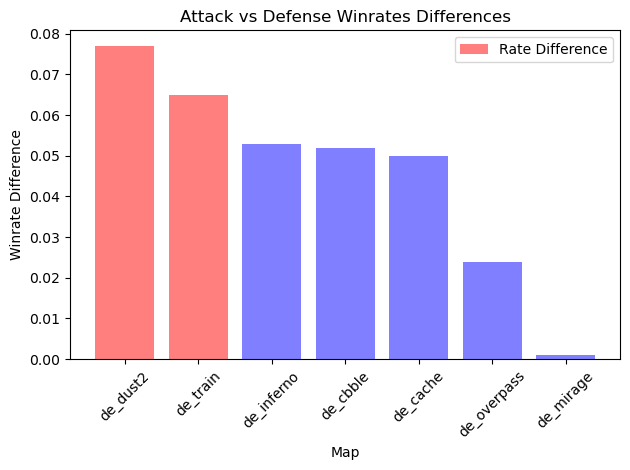

In [41]:
# get the attack and defense sided percentages in scrim play
esea_cmap_rates = spark.sql("SELECT map,\
                            ROUND(SUM(IF(winner_side = 'Terrorist', 1, 0)) / COUNT(round), 3) AS terrorist_winrate,\
                            ROUND(SUM(IF(winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round), 3) AS counter_terrorist_winrate,\
                            ROUND(ABS(SUM(IF(winner_side = 'Terrorist', 1, 0)) / COUNT(round) - SUM(IF(winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round)), 3) AS rate_diff\
                        FROM meta_table\
                        WHERE map IN ('de_cache', 'de_cbble', 'de_dust2', 'de_inferno', 'de_mirage', 'de_overpass', 'de_train')\
                        GROUP BY map\
                        ORDER BY rate_diff DESC")
esea_cmap_rates.show()

# plot the data as a bar graph
esea_cmap_rates_pd = esea_cmap_rates.toPandas()
plt.bar(esea_cmap_rates_pd['map'], esea_cmap_rates_pd['rate_diff'], label='Rate Difference',
        alpha=0.5, color=['blue' if x <= 0.06 else 'red' for x in esea_cmap_rates_pd['rate_diff']])

# customize the plot
plt.xlabel('Map')
plt.ylabel('Winrate Difference')
plt.title('Attack vs Defense Winrates Differences')
plt.xticks(rotation=45)
plt.legend()

# display the plot
plt.tight_layout()
plt.show()

Just to get some more insights, let's bring in the matchmaking data here and see how the balancing pans out here. Since there is no meta table for this data, the query will need to make use of either the `mm_grenades_demos` or `mm_masters_demos` tables, and group the data accordingly.

In [42]:
# get the attack and defense sided percentages in ranked play
mm_map_rates = spark.sql(
    "SELECT\
        round_data.map,\
        ROUND(SUM(IF(round_data.winner_side = 'Terrorist', 1, 0)) / COUNT(round_data.round), 3) AS terrorist_winrate,\
        ROUND(SUM(IF(round_data.winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round_data.round), 3) AS counter_terrorist_winrate,\
        ROUND(ABS(SUM(IF(round_data.winner_side = 'Terrorist', 1, 0)) / COUNT(round_data.round) - SUM(IF(round_data.winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round_data.round)), 3) AS rate_diff\
    FROM\
        (SELECT file, round, MAX(winner_side) AS winner_side, MAX(map) AS map\
            FROM mm_table\
            GROUP BY file, round\
        ) AS round_data\
    GROUP BY round_data.map\
    ORDER BY rate_diff DESC")

mm_map_rates.show(30)

+------------+-----------------+-------------------------+---------+
|         map|terrorist_winrate|counter_terrorist_winrate|rate_diff|
+------------+-----------------+-------------------------+---------+
|cs_insertion|            0.276|                    0.724|    0.448|
|  de_austria|            0.717|                    0.283|    0.434|
|    de_aztec|             0.35|                     0.65|      0.3|
|    cs_italy|            0.638|                    0.362|    0.277|
|     de_dust|            0.422|                    0.578|    0.156|
|   cs_office|            0.574|                    0.426|    0.148|
|de_blackgold|            0.435|                    0.565|     0.13|
|     de_nuke|            0.446|                    0.554|    0.107|
|  de_shipped|            0.448|                    0.552|    0.103|
|    de_cache|            0.539|                    0.461|    0.078|
|    de_cbble|            0.535|                    0.465|    0.069|
|  de_vertigo|            0.466|  

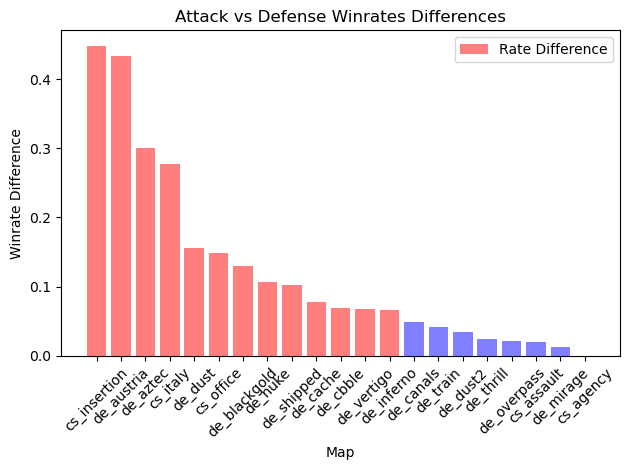

In [43]:
# plot the data as a bar graph
mm_map_rates_pd = mm_map_rates.toPandas()
plt.bar(mm_map_rates_pd['map'], mm_map_rates_pd['rate_diff'], label='Rate Difference',
        alpha=0.5, color=['blue' if x <= 0.06 else 'red' for x in mm_map_rates_pd['rate_diff']])

# customize the plot
plt.xlabel('Map')
plt.ylabel('Winrate Difference')
plt.title('Attack vs Defense Winrates Differences')
plt.xticks(rotation=45)
plt.legend()

# display the plot
plt.tight_layout()
plt.show()

There are a lot more maps here, and some of these are very unbalanced! However, some of these maps are community made (the maps with `cs_` in front of them), while other maps are used for different game modes. So again, we will limit our analysis only to the active duty map pool. Let's update our query to filter out the non competitive maps.

In [44]:
# get the attack and defense sided percentages in ranked play
mm_cmap_rates = spark.sql(
    "SELECT\
        round_data.map AS map,\
        ROUND(SUM(IF(round_data.winner_side = 'Terrorist', 1, 0)) / COUNT(round_data.round), 3) AS terrorist_winrate,\
        ROUND(SUM(IF(round_data.winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round_data.round), 3) AS counter_terrorist_winrate,\
        ROUND(ABS(SUM(IF(round_data.winner_side = 'Terrorist', 1, 0)) / COUNT(round_data.round) - SUM(IF(round_data.winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round_data.round)), 3) AS rate_diff\
    FROM\
        (SELECT file, round, MAX(winner_side) AS winner_side, MAX(map) AS map\
            FROM mm_table\
            GROUP BY file, round\
        ) AS round_data\
    WHERE round_data.map IN ('de_cache', 'de_cbble', 'de_dust2', 'de_inferno', 'de_mirage', 'de_overpass', 'de_train')\
    GROUP BY round_data.map\
    ORDER BY rate_diff DESC")

mm_cmap_rates.show(30)

+-----------+-----------------+-------------------------+---------+
|        map|terrorist_winrate|counter_terrorist_winrate|rate_diff|
+-----------+-----------------+-------------------------+---------+
|   de_cache|            0.539|                    0.461|    0.078|
|   de_cbble|            0.535|                    0.465|    0.069|
| de_inferno|            0.534|                    0.466|    0.067|
|   de_train|            0.479|                    0.521|    0.042|
|   de_dust2|            0.517|                    0.483|    0.035|
|de_overpass|            0.511|                    0.489|    0.021|
|  de_mirage|            0.506|                    0.494|    0.013|
+-----------+-----------------+-------------------------+---------+



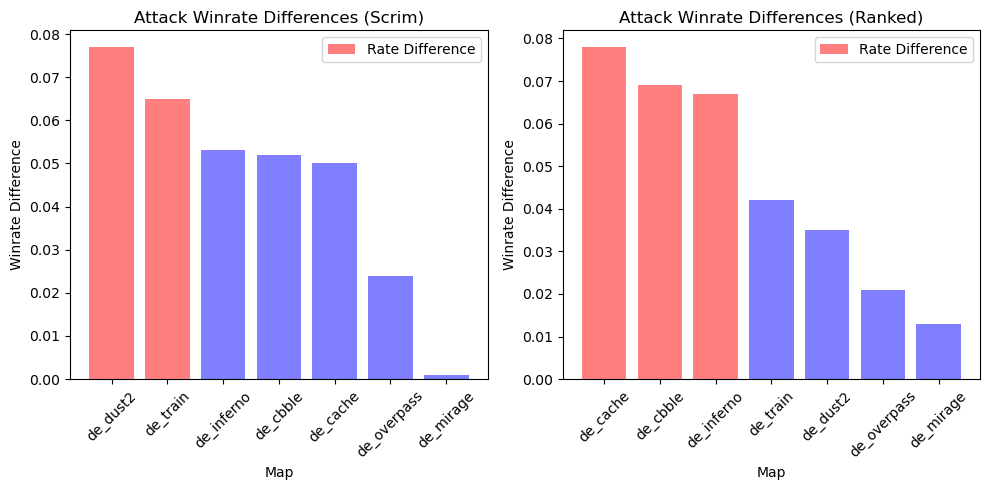

In [45]:
# plot the data as a bar graph
mm_cmap_rates_pd = mm_cmap_rates.toPandas()

# plot two bar graphs next to each other
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# customize the scrim plot
axs[0].bar(esea_cmap_rates_pd['map'], esea_cmap_rates_pd['rate_diff'], label='Rate Difference',
        alpha=0.5, color=['blue' if x <= 0.06 else 'red' for x in esea_cmap_rates_pd['rate_diff']])
axs[0].set_xlabel('Map')
axs[0].set_ylabel('Winrate Difference')
axs[0].set_title('Attack Winrate Differences (Scrim)')
axs[0].set_xticks(range(len(esea_cmap_rates_pd['map'])))
axs[0].set_xticklabels(esea_cmap_rates_pd['map'], rotation=45)
axs[0].legend()

# customize the ranked plot
axs[1].bar(mm_cmap_rates_pd['map'], mm_cmap_rates_pd['rate_diff'], label='Rate Difference',
        alpha=0.5, color=['blue' if x <= 0.06 else 'red' for x in mm_cmap_rates_pd['rate_diff']])
axs[1].set_xlabel('Map')
axs[1].set_ylabel('Winrate Difference')
axs[1].set_title('Attack Winrate Differences (Ranked)')
axs[1].set_xticks(range(len(mm_cmap_rates_pd['map'])))
axs[1].set_xticklabels(mm_cmap_rates_pd['map'], rotation=45)
axs[1].legend()

# display the plot
plt.tight_layout()
plt.show()

It looks like the rates are pretty similar for the scrim data and the ranked data, just that some of the maps are swapped around. Mirage remains the most balances map in both scenarios, really supporting the idea that it is one the best designed maps out there. Either way, the winrate differences for all maps are below 10% which is pretty good! But for how much CS:GO players claim their maps are the most balanced, I was expecting to see differences under 3 or maybe even 5 percent. But to be fair, this data is a subset of all player data.

---

## Econ Similarities to Valorant <a name="econ"></a>

---

## Does First Blood Matter? <a name="firstblood"></a>